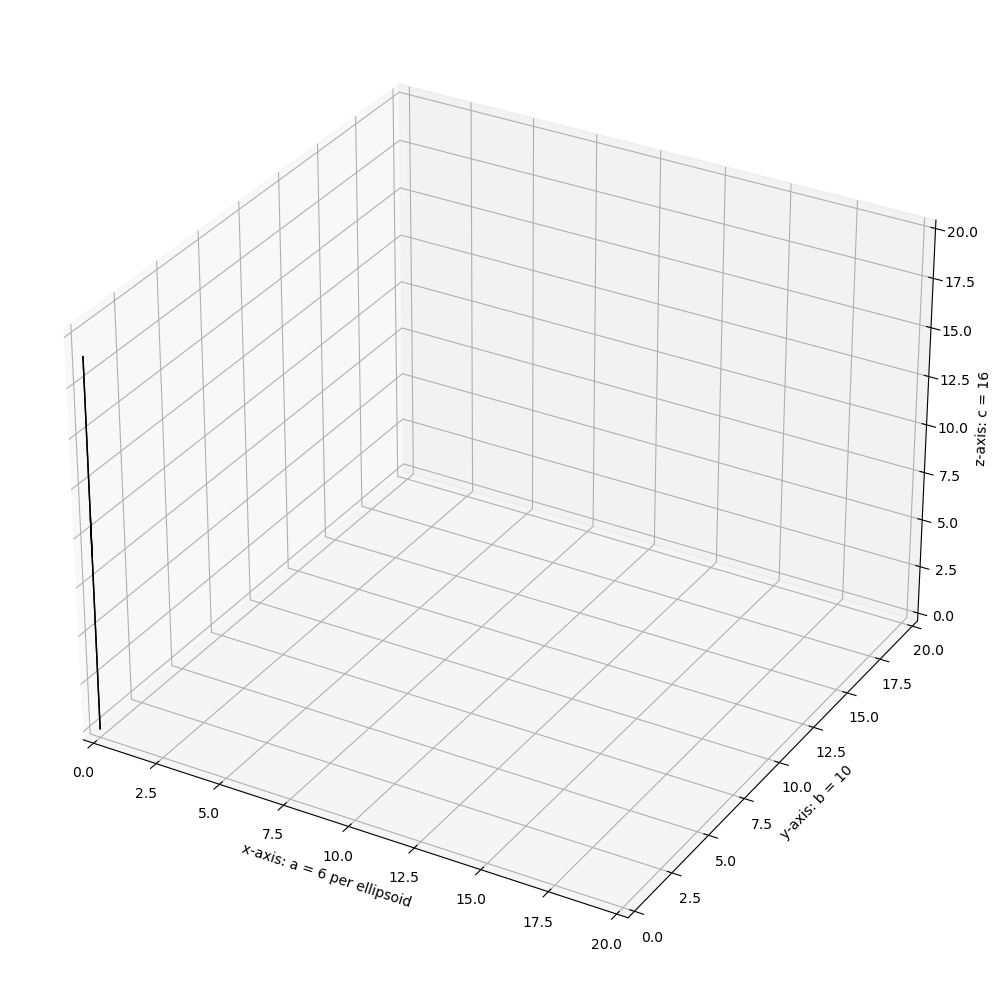

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid


# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...],
                               ellip_base[2:, ...]), axis=0)

X, Y, Z = np.mgrid[:20, :20, :20]
u = (X-10)**2 + (Y-10)**2 + (Z-10)**2 - 8**2
u = X + Y

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(u, 0)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, X.shape[0])  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, X.shape[1])  # b = 10
ax.set_zlim(0, X.shape[2])  # c = 16

plt.tight_layout()
plt.show()

In [3]:
X.shape, X.size

((20, 20, 20), 8000)

In [4]:
X

array([[[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        ...,
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1],
        [ 1,  1,  1, ...,  1,  1,  1]],

       [[ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        ...,
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2],
        [ 2,  2,  2, ...,  2,  2,  2]],

       ...,

       [[17, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        ...,
        [17, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17, 17],
        [17, 17, 17, ..., 17, 17